In [153]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [154]:
df=pd.read_csv("D:GC/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [155]:
df.shape 

(9120, 272)

In [156]:
LABELS = ["Normal" , "Abnormal"]

In [157]:
df['activity'].unique() #activity 레이블에 있는 데이터값들 확인

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

In [158]:
Normal = df[(df['activity'] == 'lyingBack') | (df['activity'] == 'lyingRigh')]
Abnormal = df[(df['activity'] != 'lyingBack') & (df['activity'] != 'lyingRigh')]

In [159]:
# 먼저 activity 열을 'activity'처럼 사용하여 정상 데이터만 학습 데이터에 포함시키고 테스트 데이터 분리
RANDOM_SEED = 42

# 'lyingBack', 'lyingRight'를 정상 데이터로 처리하고, 나머지는 비정상 데이터로 처리
df['activity'] = df['activity'].apply(lambda x: 0 if x in ['lyingBack', 'lyingRight'] else 1)

# 데이터 분할
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

# X_train에서 정상(activity == 0) 데이터만 남기고 'activity' 열 제거
X_train = X_train[X_train['activity'] == 0]
X_train = X_train.drop(['activity', 'people'], axis=1)

# y_test에 테스트 데이터의 'activity'를 저장하고, X_test에서 'activity' 제거
y_test = X_test['activity']
X_test = X_test.drop(['activity', 'people'], axis=1)

# numpy 배열로 변환
X_train = X_train.values
X_test = X_test.values

# 데이터 크기 확인
print(X_train.shape)
print(X_test.shape)

(376, 270)
(1824, 270)


대칭형 오토인코더

In [160]:
input_dim = X_train.shape[1]  

input_layer = Input(shape=(input_dim,))
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
    
    # Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

sae = Model(inputs=input_layer, outputs=decoded)
sae.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [161]:
history = sae.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - loss: 5.6742 - val_loss: 6.5926
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.4997 - val_loss: 6.1869
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.0905 - val_loss: 5.9280
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.8458 - val_loss: 5.8860
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.8025 - val_loss: 5.8774
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7935 - val_loss: 5.8790
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7909 - val_loss: 5.8780
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.7760 - val_loss: 5.8777
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.7966 - val_loss: 5.8814
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.8011 - val_loss: 5.8801
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.7938 - val_loss: 5.8826
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.7986 - val_loss: 5.8831


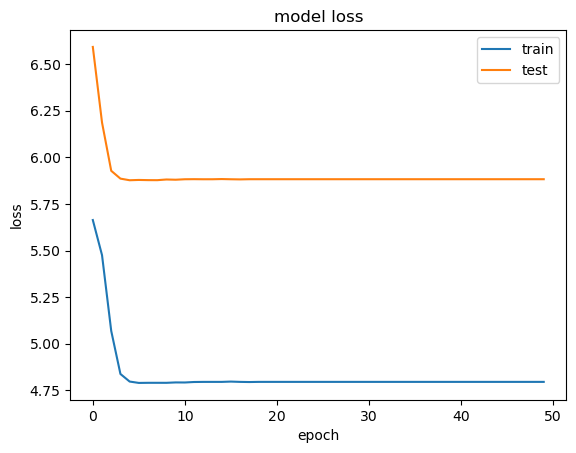

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [163]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.446088,0.942982
std,205.805999,0.231940
min,4.555831,0.000000
25%,5.548857,1.000000
50%,11.561952,1.000000
75%,23.663740,1.000000
max,2039.934805,1.000000


In [164]:

error_df.head()

,reconstruction_error,true_class
8225,48.179776,1
3133,5.026638,1
1446,5.556335,1
4568,43.447819,1
6022,8.872763,1


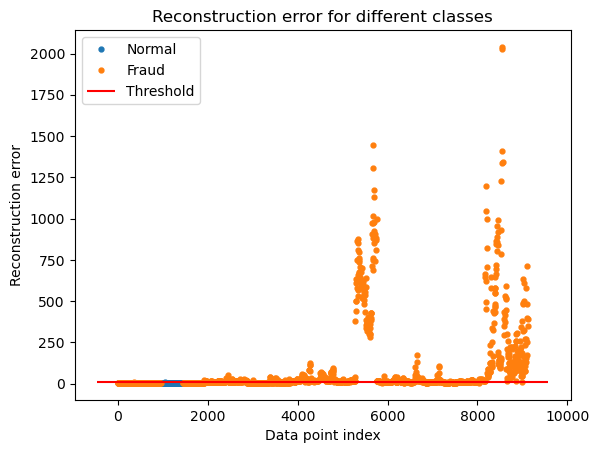

In [165]:
threshold = 10
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

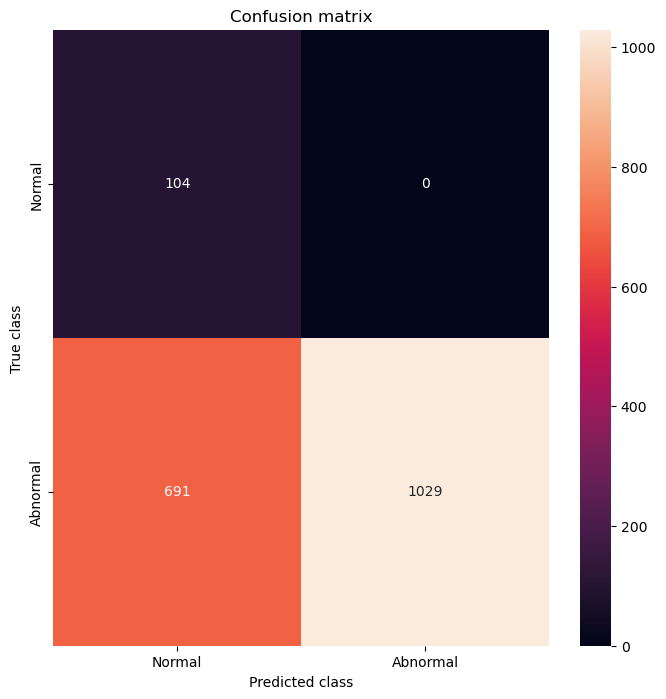

              precision    recall  f1-score   support

           0       0.13      1.00      0.23       104
           1       1.00      0.60      0.75      1720

    accuracy                           0.62      1824
   macro avg       0.57      0.80      0.49      1824
weighted avg       0.95      0.62      0.72      1824



In [166]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

비대칭형 오토인코더

In [167]:
input_dim = X_train.shape[1]  

input_layer = Input(shape=(input_dim,))
encoded = Dense(512, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)  # 더 작게 압축
    
    # Decoder
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)# 더 큰 뉴런 수로 확장
decoded = Dense(input_dim, activation='sigmoid')(decoded)

asae = Model(inputs=input_layer, outputs=decoded)
asae.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [168]:
history = asae.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 5.6692 - val_loss: 6.3747
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.2643 - val_loss: 5.9394
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.8554 - val_loss: 5.8787
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.7963 - val_loss: 5.8762
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.7716 - val_loss: 5.8771
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.7716 - val_loss: 5.8798
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.8000 - val_loss: 5.8791
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.7709 - val_loss: 5.8787
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.7957 - val_loss: 5.8789
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.7977 - val_loss: 5.8806
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.7748 - val_loss: 5.8791
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.7742 - val_loss: 5.8799


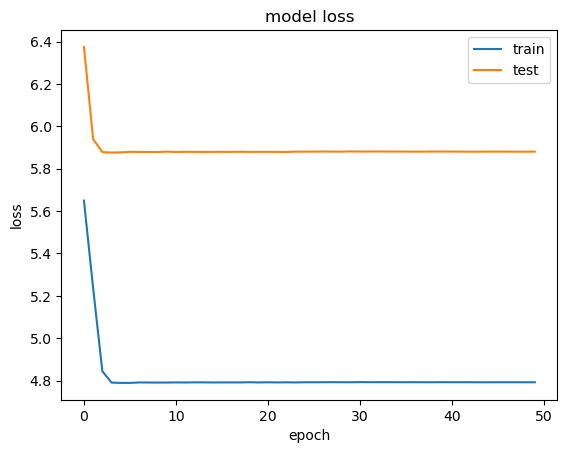

In [169]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [170]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = sae.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.451223,0.942982
std,205.803849,0.231940
min,4.560888,0.000000
25%,5.562965,1.000000
50%,11.564075,1.000000
75%,23.668159,1.000000
max,2039.931388,1.000000


In [171]:

error_df.head()

,reconstruction_error,true_class
8225,48.184462,1
3133,5.036211,1
1446,5.562250,1
4568,43.441444,1
6022,8.875758,1


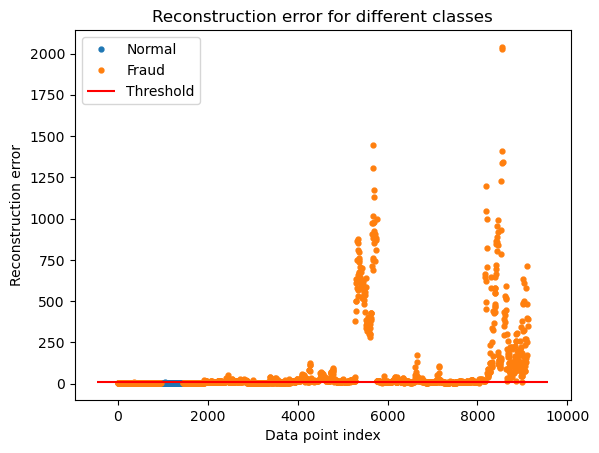

In [172]:
threshold = 10
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

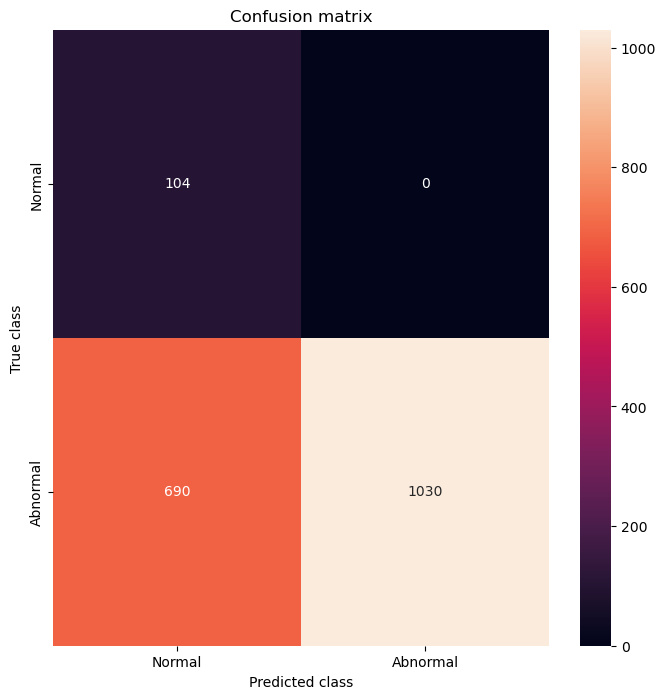

              precision    recall  f1-score   support

           0       0.13      1.00      0.23       104
           1       1.00      0.60      0.75      1720

    accuracy                           0.62      1824
   macro avg       0.57      0.80      0.49      1824
weighted avg       0.95      0.62      0.72      1824



In [173]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

Denoising Autoencoder

In [174]:
import numpy as np

import matplotlib.pyplot as plt

from keras.layers import Input, Dense

from keras.models import Model


#노이즈 데이터생성

np.random.seed(42)

noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)


In [177]:
#노이즈 데이터,원본데이터로 대칭 오토인코더 학습

history=sae.fit(X_train_noisy, X_train, epochs=50, batch_size=16, shuffle=True)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0356
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9029
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7678
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9075
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8283
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0553
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8655
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8526
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0956
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1953
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0936
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0383
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7954
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8428
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7821
Epoch 16/50
24/24 ━

In [179]:
predictions = sae.predict(X_test_noisy)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.451013,0.942982
std,205.804044,0.231940
min,4.562824,0.000000
25%,5.564661,1.000000
50%,11.565766,1.000000
75%,23.668665,1.000000
max,2039.927264,1.000000


In [180]:

error_df.head()

,reconstruction_error,true_class
8225,48.179131,1
3133,5.032186,1
1446,5.562658,1
4568,43.443332,1
6022,8.877870,1


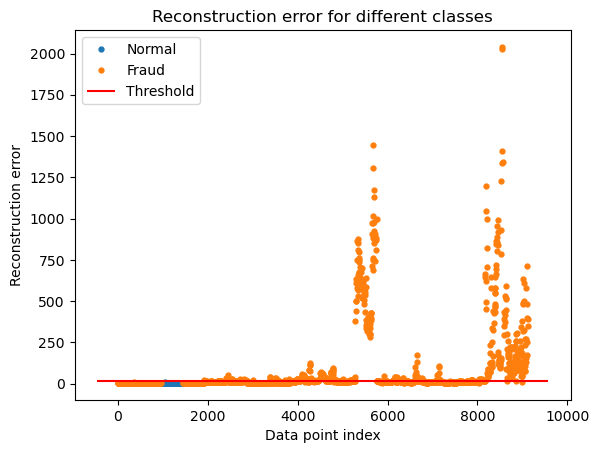

In [182]:
threshold = 15


groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

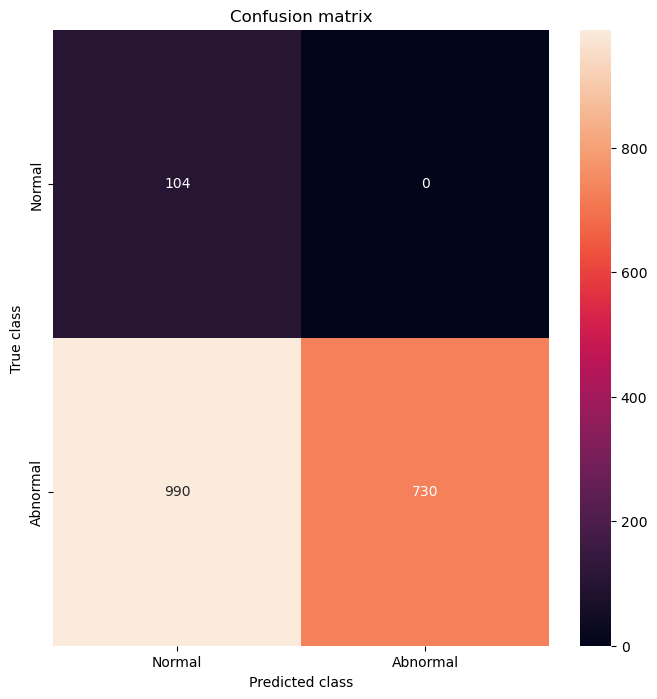

              precision    recall  f1-score   support

           0       0.10      1.00      0.17       104
           1       1.00      0.42      0.60      1720

    accuracy                           0.46      1824
   macro avg       0.55      0.71      0.38      1824
weighted avg       0.95      0.46      0.57      1824



In [183]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

노이즈데이터,비대칭 오토인코더 학습


In [188]:
history=asae.fit(X_train_noisy, X_train, epochs=50, batch_size=16, shuffle=True)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7994
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9263
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8173
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9123
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9305
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8507
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8581
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8291
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0734
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7795
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8825
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8869
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8896
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7977
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9272
Epoch 16/50
24/24 ━

In [185]:
predictions = asae.predict(X_test_noisy)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,reconstruction_error,true_class
count,1824.000000,1824.000000
mean,81.444531,0.942982
std,205.804984,0.231940
min,4.562052,0.000000
25%,5.555281,1.000000
50%,11.564152,1.000000
75%,23.665700,1.000000
max,2039.921173,1.000000


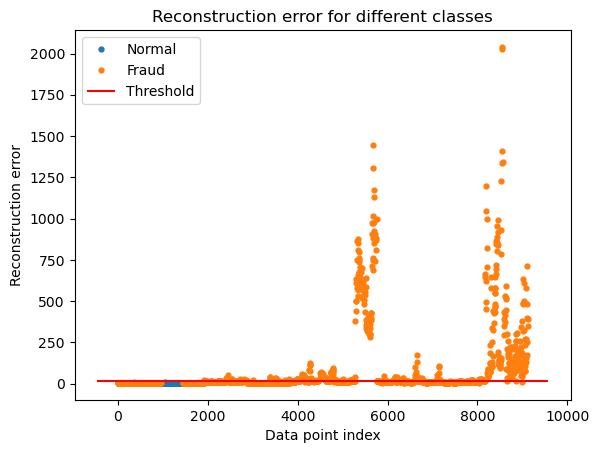

In [186]:
threshold = 15


groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

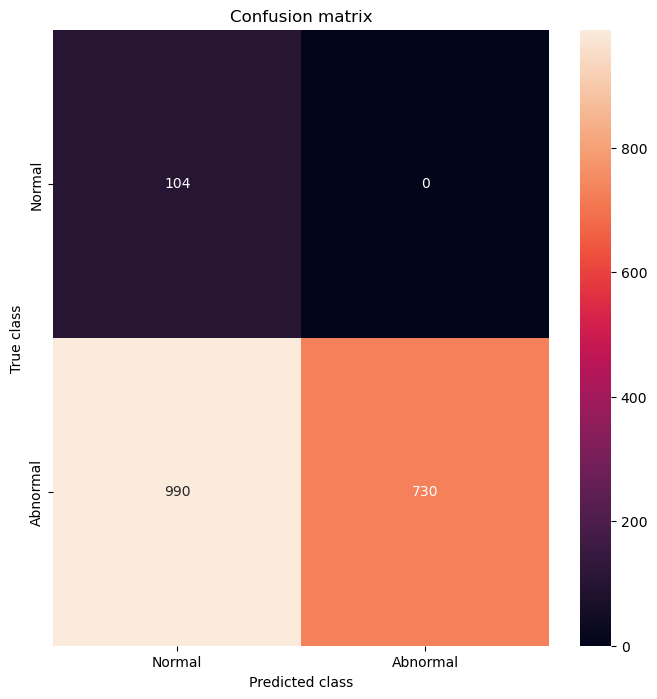

              precision    recall  f1-score   support

           0       0.10      1.00      0.17       104
           1       1.00      0.42      0.60      1720

    accuracy                           0.46      1824
   macro avg       0.55      0.71      0.38      1824
weighted avg       0.95      0.46      0.57      1824



In [187]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))